## Imports

In [21]:
# xcms
require(xcms)

# download from MASSive
require(RCurl)
MY_URL <- "ftp://massive.ucsd.edu/peak/"
MY_USERNAME_PWD <- "MSV000084403:a"
MY_MZML_DIR <- '~/my_mzml_directory/'


# tidyverse
require(tidyverse)
require(readxl)
require(janitor)
require(stringr)
require(broom)

# better graphs
require(ggfortify)
require(viridis)
require(cowplot)

## File collection and annotation

In [25]:
url <- "ftp://massive.ucsd.edu/peak/"
userpwd <- "MSV000084403:a"
destination <- '~/my_mzml_directory/'

filenames = getURL(MY_URL, 
                   ftp.use.epsv = FALSE, 
                   dirlistonly = TRUE,
                   userpwd = MY_USERNAME_PWD) %>%
            str_split('\n') %>%
            unlist()

filenames


for (fname in filenames){
    cmd <- paste0("curl -u ",
                  MY_USERNAME_PWD, 
                  ' ',
                  MY_URL, fname,
                  " -o ",
                  MY_MZML_DIR, fname)
    print(cmd)
    system(cmd)
}



[1] "samp01_rep01.mzML" "samp01_rep02.mzML" "samp02_rep01.mzML"
 [4] "samp02_rep02.mzML" "samp03_rep01.mzML" "samp03_rep02.mzML"
 [7] "samp04_rep01.mzML" "samp04_rep02.mzML" "samp05_rep01.mzML"
[10] "samp05_rep02.mzML" "samp06_rep01.mzML" "samp06_rep02.mzML"
[13] "samp07_rep01.mzML" "samp07_rep02.mzML" "samp08_rep01.mzML"
[16] "samp08_rep02.mzML" "samp09_rep01.mzML" "samp09_rep02.mzML"
[19] "samp10_rep01.mzML" "samp10_rep02.mzML" ""

[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp01_rep01.mzML -o ~/my_mzml_directory/samp01_rep01.mzML"
[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp01_rep02.mzML -o ~/my_mzml_directory/samp01_rep02.mzML"
[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp02_rep01.mzML -o ~/my_mzml_directory/samp02_rep01.mzML"
[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp02_rep02.mzML -o ~/my_mzml_directory/samp02_rep02.mzML"
[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp03_rep01.mzML -o ~/my_mzml_directory/samp03_rep01.mzML"
[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp03_rep02.mzML -o ~/my_mzml_directory/samp03_rep02.mzML"
[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp04_rep01.mzML -o ~/my_mzml_directory/samp04_rep01.mzML"
[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp04_rep02.mzML -o ~/my_mzml_directory/samp04_rep02.mzML"
[1] "curl -u MSV000084403:a ftp://massive.ucsd.edu/peak/samp05_rep01.mzM

In [26]:
## get full paths and wells for files we have
my_files <- list.files(path = MY_MZML_DIR,
                   pattern = '*.mzML',
                   full.names = T)


## annotate these files
phenodat <- tibble(fname = my_files) %>%
    mutate(sample = str_extract(fname, '(?<=samp)[0-9]{1,2}') %>% as.numeric,
           replicate = str_extract(fname, '(?<=rep)[0-9]{2}')) %>%
    mutate(group = ifelse(sample <= 5, 'CH3OH', 'CD3OH')) 

phenodat
    

fname,sample,replicate,group
<chr>,<dbl>,<chr>,<chr>
/Users/curt/my_mzml_directory//samp01_rep01.mzML,1,01,CH3OH
/Users/curt/my_mzml_directory//samp01_rep02.mzML,1,02,CH3OH
/Users/curt/my_mzml_directory//samp02_rep01.mzML,2,01,CH3OH
/Users/curt/my_mzml_directory//samp02_rep02.mzML,2,02,CH3OH
/Users/curt/my_mzml_directory//samp03_rep01.mzML,3,01,CH3OH
/Users/curt/my_mzml_directory//samp03_rep02.mzML,3,02,CH3OH
/Users/curt/my_mzml_directory//samp04_rep01.mzML,4,01,CH3OH
/Users/curt/my_mzml_directory//samp04_rep02.mzML,4,02,CH3OH
/Users/curt/my_mzml_directory//samp05_rep01.mzML,5,01,CH3OH


## XCMS

R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send

R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send

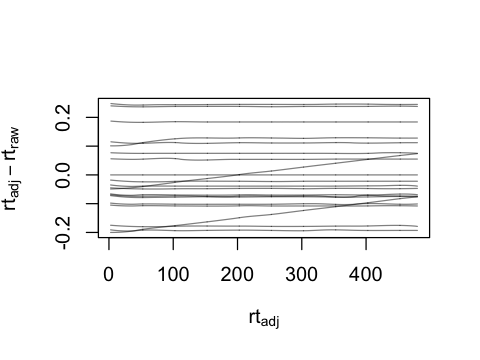

In [27]:
my_fnames <- phenodat %>% pull(fname)

## link code to files
raw_data <- readMSData(files = my_fnames,
           pdata = new("NAnnotatedDataFrame", phenodat),
           mode = "onDisk") 

## feature detection
cwp <- CentWaveParam(peakwidth = c(7.5, 20),
                     noise = 1200,
                     ppm=10)
xdata <- findChromPeaks(raw_data, param = cwp)

## retention time correction
xdata <- adjustRtime(xdata, param = ObiwarpParam(binSize = 0.3))

options(repr.plot.width=4, repr.plot.height=3)
plotAdjustedRtime(xdata)

## Correspondence: group peaks across samples.
pdp <- PeakDensityParam(sampleGroups = xdata@phenoData@data$group,
                        minFraction = 0.6,
                        bw = 0.5,
                        binSize = 0.1)

xdata <- groupChromPeaks(xdata, param = pdp)

## fill missing data
xdata <- fillChromPeaks(xdata)

## save
save(xdata, file='saved_data/xcms_r_object_pos.rdat')

In [28]:
load('saved_data/xcms_r_object_pos.rdat')

xdata

MSn experiment data ("XCMSnExp")
Object size in memory: 6.17 Mb
- - - Spectra data - - -
 MS level(s): 1 
 Number of spectra: 19074 
 MSn retention times: 0:3 - 7:60 minutes
- - - Processing information - - -
Data loaded [Tue Oct  1 17:15:11 2019] 
 MSnbase version: 2.10.1 
- - - Meta data  - - -
phenoData
  rowNames: 1 2 ... 3 (20 total)
  varLabels: fname sample replicate group
  varMetadata: labelDescription
Loaded from:
  [1] samp01_rep01.mzML...  [20] samp10_rep02.mzML
  Use 'fileNames(.)' to see all files.
protocolData: none
featureData
  featureNames: F01.S001 F01.S002 ... F20.S954 (19074 total)
  fvarLabels: fileIdx spIdx ... spectrum (33 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
- - - xcms preprocessing - - -
Chromatographic peak detection:
 method: centWave 
 189388 peaks identified in 20 samples.
 On average 9469 chromatographic peaks per sample.
Alignment/retention time adjustment:
 method: obiwarp 
Correspondence:
 method: chromat

### PCA  on `asinh`-transformed data

In [29]:
pseudoLog10 <- function(x) { asinh(x/2)/log(10) }

In [30]:
# get feature intensity matrix

ft_ints <- 
    xdata %>% 
    featureValues(value="into") %>% 
    replace_na(0) %>% 
    pseudoLog10 %>%
    as.data.frame %>%
    rownames_to_column() %>%
    gather(sample, value, -rowname) %>%
    group_by(rowname) %>%
    filter(max(value) > 3.5) %>%
    spread(sample, value) %>%
    column_to_rownames('rowname') %>%
    as.matrix

In [68]:
my_pca <- 
    ft_ints %>% 
    t %>%
    as_tibble %>%
    nest() %>% 
    mutate(pca = map(data, 
                     ~ prcomp(.x, center = TRUE, scale = FALSE)
                     ),
         pca_aug = map2(pca, data, ~augment(.x, data = .y)))

Warning message:
“`...` must not be empty for ungrouped data frames.
Did you want `data = everything()`?”

In [81]:
var_exp <- my_pca %>%
    unnest(pca_aug) %>%
    summarize_at(.vars = vars(contains("PC", ignore.case=FALSE)), .funs = list(var)) %>%
    gather(key = pc, value = variance) %>%
    mutate(var_exp = variance/sum(variance),
           cum_var_exp = cumsum(var_exp),
           pc = str_replace(pc, ".fitted", "")
           )

var_exp

pc,variance,var_exp,cum_var_exp
<chr>,<dbl>,<dbl>,<dbl>
PC1,6.865384e+02,2.902629e-01,0.2902629
PC2,5.817680e+02,2.459668e-01,0.5362298
PC3,1.954117e+02,8.261850e-02,0.6188483
PC4,1.369366e+02,5.789568e-02,0.6767439
PC5,1.207657e+02,5.105876e-02,0.7278027
PC6,1.134499e+02,4.796571e-02,0.7757684
PC7,7.509254e+01,3.174852e-02,0.8075169
PC8,6.870928e+01,2.904973e-02,0.8365667
PC9,5.522817e+01,2.335003e-02,0.8599167


Adding missing grouping variables: `sample_class`, `sample_name`


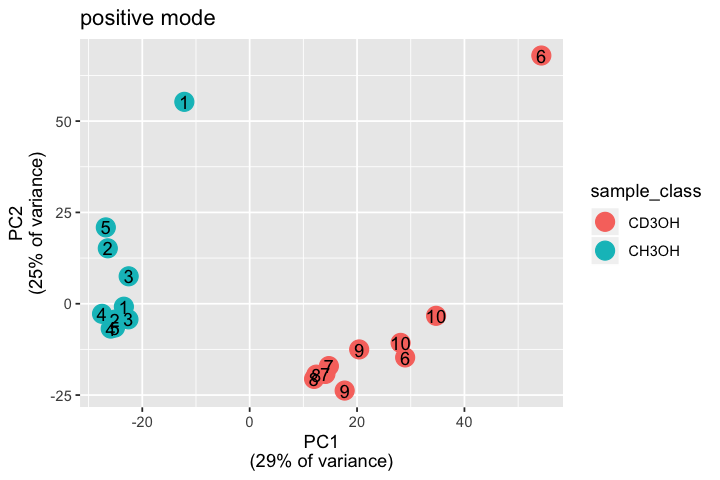

In [82]:
options(repr.plot.width=6, repr.plot.height=4)

my_pca %>% 
    pull(pca) %>% 
    '[['(1) %>% 
    '[['('x') %>%   
    as_tibble %>%
    mutate(sample_class = xdata@phenoData@data$group,
           sample_name = xdata@phenoData@data$sample) %>%
    group_by(sample_class, sample_name) %>%
    select(`PC1`, `PC2`, `PC3`) %>%
    ggplot(aes(x=PC1,
               y=PC2, 
               color = sample_class,
               label = sample_name)
          ) +
    scale_x_continuous(name = 'PC1\n(29% of variance)') +
    scale_y_continuous(name = 'PC2\n(25% of variance)') +
    geom_point(size=5) +
    geom_text(color='black') +
    ggtitle('positive mode')

## Model each feature's intensity as a function of group ID 
(I.e., do t-tests)

In [83]:
my_names <- ft_ints %>% row.names
modeled <- ft_ints %>% 
    as_tibble() %>%
    mutate(name = my_names) %>%
    gather(fname, value, -name) %>%
    left_join(phenodat %>% mutate(fname = basename(fname)), by='fname') %>%
    select(name, value, group, sample) %>%
    mutate(sample = factor(sample)) %>%
    group_by(name) %>%
    do(tidy(lm(formula = value ~ 1 + I(group),
                          data=.)
             )
      ) 

group_effects <-
    modeled %>%
    filter(!str_detect(term, 'Intercept'))

intercepts <-
    modeled %>%
    filter(str_detect(term, 'Intercept'))

all_params_wide <-
    group_effects %>% 
    left_join(intercepts %>% mutate(intercept = estimate) %>% select(name, intercept),
              by='name') %>%
    left_join(featureDefinitions(xdata) %>% as.data.frame %>% rownames_to_column(),
              by = c('name' = 'rowname')) %>%
    mutate(fold_change = estimate) %>% select(-estimate) %>%
    select(name, fold_change, std.error, p.value, intercept, mzmed, rtmed, npeaks, CH3OH, CD3OH)

all_params_wide %>% arrange(p.value) %>% head
    

name,fold_change,std.error,p.value,intercept,mzmed,rtmed,npeaks,CH3OH,CD3OH
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FT0889,-5.295952,0.02184063,4.368873e-33,5.295952e+00,217.1709,282.71666,10,0,10
FT0723,-4.452680,0.03302508,1.682893e-28,4.452680e+00,202.1514,277.71529,10,0,10
FT2709,-3.852052,0.03331308,2.662814e-27,3.852052e+00,388.2926,307.72101,8,0,8
FT2389,-4.760126,0.04178195,3.477338e-27,4.760126e+00,362.1928,63.18211,9,0,9
FT6256,4.526789,0.04428522,2.442135e-26,-7.944109e-16,822.4898,336.22572,6,6,0
FT2200,-4.389516,0.04710207,1.286057e-25,4.389516e+00,347.3003,313.22249,10,0,10


In [84]:
P.VALUE.CUTOFF <- 1e-5
LOGP.CUTOFF <- -log10(P.VALUE.CUTOFF)
FOLD_CHANGE.CUTOFF <- 1.5

Warning message:
“Removed 5854 rows containing missing values (geom_text).”Warning message:
“Removed 5854 rows containing missing values (geom_text).”Warning message:
“Removed 5854 rows containing missing values (geom_text).”

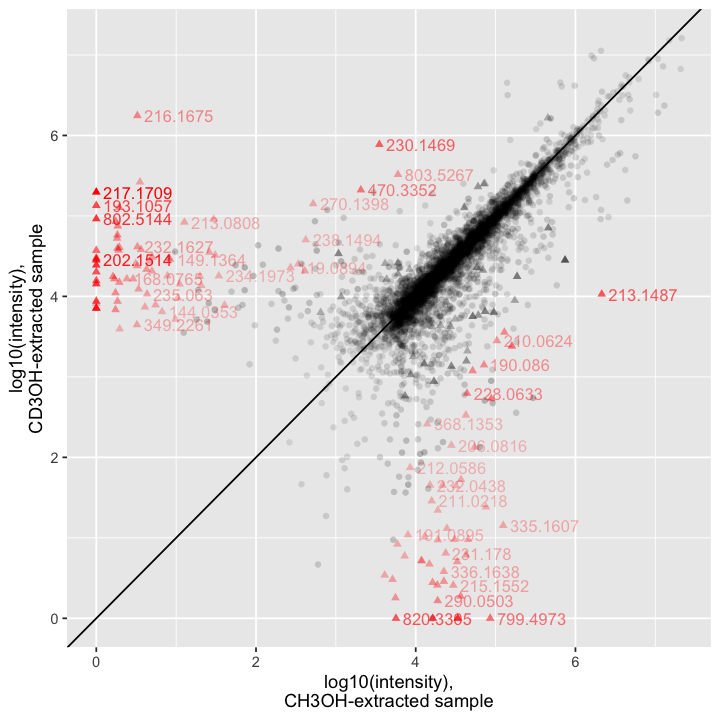

In [85]:
options(repr.plot.width=6, repr.plot.height=6)
p1 <- 
    all_params_wide %>%
    filter(rtmed > 100) %>%
    mutate(lbl = ifelse(-log10(p.value) > LOGP.CUTOFF & abs(fold_change) > FOLD_CHANGE.CUTOFF,
                        mzmed %>% round(4) %>% as.character, NA)) %>%
    ggplot(aes(x=intercept + fold_change, y=intercept, 
               shape = -log10(p.value) > LOGP.CUTOFF, 
               alpha = -log10(p.value),
               color = -log10(p.value) > LOGP.CUTOFF & abs(fold_change) > FOLD_CHANGE.CUTOFF,
               label = lbl
               )
          ) +
        geom_point() +
        geom_text(hjust=-0.1, size=3.5, check_overlap = T) +
        geom_abline(slope=1) +
        scale_color_manual(values = c('black', 'red')) +
        theme(legend.position = 'none') +
        scale_x_continuous(name = 'log10(intensity),\nCH3OH-extracted sample') +
        scale_y_continuous(name = 'log10(intensity),\nCD3OH-extracted sample')

p1

ggsave('graphs/pos_mode_scatter.pdf', height=6, width=6)
ggsave('graphs/pos_mode_scatter.png', height=6, width=6)

## Find pairs of significantly altered features that:
### have a mass difference of $\require{mhchem}\ce{D3} - \ce{H3}$
### have the same retention time

In [86]:
3.01883 * (1-350/1e6)
3.01883 * (1+350/1e6)


[1] 3.017773

[1] 3.019887

In [87]:
three_d_neutrons <- 3.01883
MASS.CUTOFF.PPM <- 100
RT.CUTOFF <- 5
MASS.CUTOFF.HIGH <- three_d_neutrons * (1 + MASS.CUTOFF.PPM/1e6)
MASS.CUTOFF.LOW <- three_d_neutrons * (1 - MASS.CUTOFF.PPM/1e6)

Adding missing grouping variables: `name`
Adding missing grouping variables: `name`
Warning message:
“Removed 5854 rows containing missing values (geom_text).”Warning message:
“Removed 5854 rows containing missing values (geom_text).”Warning message:
“Removed 5854 rows containing missing values (geom_text).”

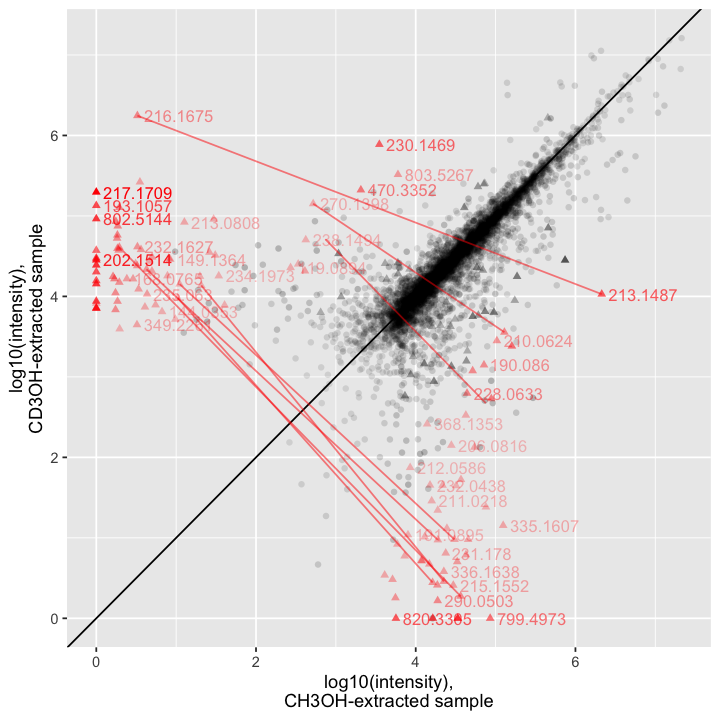

In [88]:
hits <- all_params_wide %>% 
    filter(p.value < P.VALUE.CUTOFF, abs(fold_change) > FOLD_CHANGE.CUTOFF) %>%
    mutate(foo=1) %>%
    left_join(., ., by=c('foo')) %>%
    filter(abs(rtmed.x - rtmed.y) < RT.CUTOFF,   
            mzmed.y > mzmed.x,   # avoid double-counting
           (mzmed.y - mzmed.x) > MASS.CUTOFF.LOW, 
           (mzmed.y - mzmed.x) < MASS.CUTOFF.HIGH ) %>%
    ungroup %>% 
    mutate(row = row_number()) %>%
    select(row, name.x, name.y) %>%
    gather(set, feature, -row) %>%
    mutate(set = ifelse(set == 'name.x', 'CH3OH', 'CD3OH') %>% as.factor) %>%
    mutate(set = fct_relevel(set, 'CH3OH', after=0)) %>%
    spread(set, feature)
    
hit_plot <-
    hits %>% 
    left_join(all_params_wide %>% 
                  mutate(x.h = intercept + fold_change) %>%
                  select(x.h, y.h = intercept, p.value, mzmed, rtmed), 
              by=c('CH3OH'='name')) %>%
    left_join(all_params_wide %>%
              mutate(x.d = intercept + fold_change) %>%
                  select(x.d, y.d = intercept, p.value, mzmed, rtmed), 
              by=c('CD3OH'='name')) %>%
    select(row, x.h, y.h, x.d, y.d) %>%
    gather(var, x, x.h, x.d, -row) %>%
    gather(var.y, y, y.h, y.d, -row, -var) %>%
    group_by(row) %>%
    filter(var == 'x.h' & var.y == 'y.h' | var == 'x.d' & var.y == 'y.d') %>%
    mutate(lbl = '', p.value = 0.5)


    
p1 + 
    geom_line(data=hit_plot, aes(x=x, y=y, group=row), color='red', alpha=0.5)

ggsave('graphs/pos_mode_scatter_paired.pdf', height=6, width=6)
ggsave('graphs/pos_mode_scatter_paired.png', height=6, width=6)

Adding missing grouping variables: `name`
Adding missing grouping variables: `name`
Warning message:
“Ignoring unknown aesthetics: y”

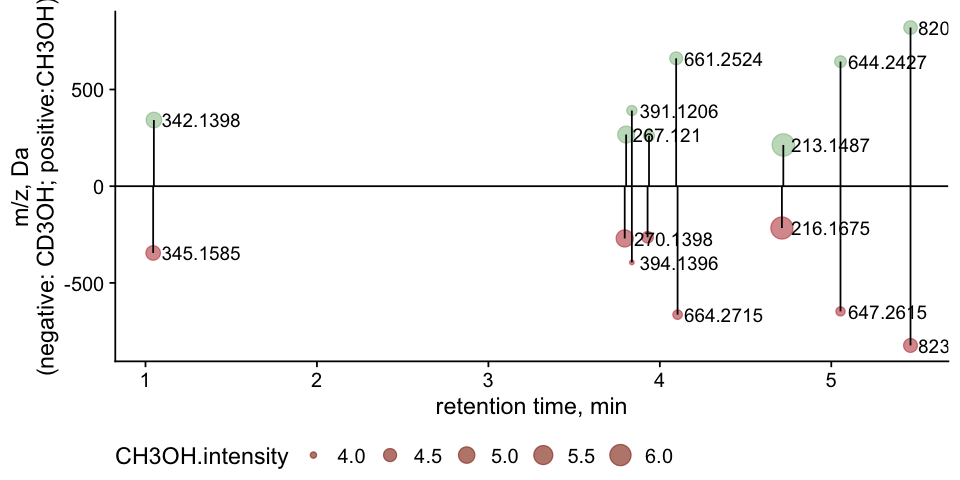

In [103]:
hits %>% 
    left_join(all_params_wide %>% 
                  mutate(x.h = intercept + fold_change) %>%
                  select(x.h, y.h = intercept, p.value, mzmed, rtmed), 
              by=c('CH3OH'='name')) %>%
    left_join(all_params_wide %>%
              mutate(x.d = intercept + fold_change) %>%
                  select(x.d, y.d = intercept, p.value, mzmed, rtmed), 
              by=c('CD3OH'='name')) %>%
    select(CH3OH, CD3OH, CH3OH.intensity=x.h, CD3OH.intensity=y.d, 
           p.value.CH3OH = p.value.x,
           p.value.CD3OH = p.value.y,
           mzmed.CH3OH = mzmed.x,
           mzmed.CD3OH = mzmed.y,
           rtmed.CH3OH = rtmed.x,
           rtmed.CD3OH = rtmed.y
           ) %>%
    arrange(rtmed.CH3OH) ->
    hit_table

options(repr.plot.width=8, repr.plot.height=4)

hit_table %>%
    ggplot(aes(x=rtmed.CH3OH/60, y=mzmed.CH3OH, ymin=0, ymax = mzmed.CH3OH,
               size=CH3OH.intensity, label = mzmed.CH3OH %>% round(4))) +
        geom_point(color='forestgreen', alpha=0.3) +
        geom_errorbar(width=0, size=0.5) +
        geom_text(size = 4, hjust=-0.1, check_overlap = T) +
        geom_point(aes(x=rtmed.CD3OH/60, y=-mzmed.CD3OH, size=CD3OH.intensity), color='firebrick', alpha=0.5) +
        geom_errorbar(aes(x=rtmed.CD3OH/60,  ymin=0, ymax=-mzmed.CD3OH, y=-mzmed.CD3OH), width=0, size=0.5) +
        geom_text(size = 4, hjust=-0.1, check_overlap = T, aes(label = mzmed.CD3OH %>% round(4), y=-mzmed.CD3OH)) +
        theme_cowplot() +
        theme(legend.position = 'bottom') +
        geom_abline(intercept = 0, slope=0) +
        xlab('retention time, min') +
        ylab('m/z, Da\n(negative: CD3OH; positive:CH3OH)')
        

In [104]:
hit_table %>%
    mutate(avg_rt = ((rtmed.CH3OH + rtmed.CD3OH) / 2 )) %>%
    mutate(approx.rt = avg_rt %>% round(0)) %>%
    group_by(approx.rt) 

CH3OH,CD3OH,CH3OH.intensity,CD3OH.intensity,p.value.CH3OH,p.value.CD3OH,mzmed.CH3OH,mzmed.CD3OH,rtmed.CH3OH,rtmed.CD3OH,avg_rt,approx.rt
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FT2122,FT2171,4.877962,4.710542,1.794188e-06,6.017511e-13,342.1398,345.1585,62.93043,62.68344,62.80693,63
FT1347,FT1378,5.110398,5.151923,4.575414e-12,5.750295e-07,267.1210,270.1398,228.20755,227.70800,227.95778,228
FT2742,FT2777,4.211215,3.980176,2.548459e-10,4.507042e-06,391.1206,394.1396,230.20862,230.20878,230.20870,230
FT1289,FT1322,4.277126,4.336508,1.699914e-07,9.216228e-10,261.0737,264.0924,236.20906,235.70885,235.95895,236
FT5269,FT5299,4.485124,4.153572,6.903719e-08,1.278762e-06,661.2524,664.2715,245.71101,246.21031,245.96066,246
FT0844,FT0879,6.329363,6.246499,1.095318e-19,2.303823e-12,213.1487,216.1675,283.21681,282.71701,282.96691,283
FT5164,FT5194,4.352293,4.136283,2.976586e-10,6.040734e-06,644.2427,647.2615,303.22017,303.22095,303.22056,303
FT6235,FT6264,4.562934,4.610985,1.284181e-11,2.050999e-11,820.4756,823.4942,327.72446,327.72479,327.72462,328


Manual annotation of the hits is continued in the accompanying `CH3OH_vs_CD3OH_xcms_hit_annotation.xlsx` file.